In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sn
artists_df=pd.read_csv('artists.csv')
data_df = pd.read_csv('data_o.csv')

data_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [18]:
top_100_songs = data_df.sort_values(by='popularity',ascending=False)

top_100_songs.head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
19611,0.1450,2020,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,Dakiti,100,2020-10-30,0.0544,109.928
19606,0.7560,2020,0.22100,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989
19618,0.7370,2020,0.01120,['BTS'],0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044
19608,0.3570,2020,0.01940,"['Cardi B', 'Megan Thee Stallion']",0.935,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073
19610,0.6820,2020,0.46800,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015
19612,0.5430,2020,0.65000,['Pop Smoke'],0.709,160000,0.548,1,1tkg4EHVoqnhR6iFEXb60y,0.000002,10,0.1330,-8.493,1,What You Know Bout Love,96,2020-07-03,0.3530,83.995
19616,0.3340,2020,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,96,2020-03-20,0.0598,171.005
19607,0.3470,2020,0.11400,"['Pop Smoke', 'Lil Baby', 'DaBaby']",0.823,190476,0.586,1,0PvFJmanyNQMseIFrU708S,0.000000,6,0.1930,-6.606,0,For The Night (feat. Lil Baby & DaBaby),95,2020-07-03,0.2000,125.971
19615,0.3720,2020,0.19600,"['Justin Bieber', 'Chance the Rapper']",0.673,212093,0.704,0,5u1n1kITHCxxp8twBcZxWy,0.000000,6,0.0898,-8.056,1,Holy (feat. Chance The Rapper),95,2020-09-18,0.3600,86.919
19620,0.0927,2020,0.86400,"['Justin Bieber', 'benny blanco']",0.631,149297,0.239,1,4y4spB9m0Q6026KfkAvy9Q,0.000000,11,0.1160,-7.071,0,Lonely (with benny blanco),95,2020-10-16,0.0398,79.859


In [5]:
artists_df=pd.read_csv('artists.csv')
artists_df['expanded genres']=artists_df['genres'].str.strip("[]'")
artists_df['expanded genres']=artists_df['expanded genres'].apply(lambda s:s.replace("'",""))
expanded_genres=artists_df['expanded genres'].str.split(',\s+',expand=True).stack().value_counts()
expanded_genres.to_frame()
top_25_perc_pop=artists_df[artists_df['popularity']>41]
genres_count=top_25_perc_pop['expanded genres'].str.split(',\s+',expand=True).stack().value_counts().to_frame().rename(columns={0:'Counts of Genres'}).iloc[1: , :]



In [6]:
top_quart_genres_ct=genres_count[genres_count['Counts of Genres']>22]
genres_top_100=top_quart_genres_ct.iloc[0:99 , :]
genres_top_10=top_quart_genres_ct.iloc[0:9 , :]
genres_middle_10=top_quart_genres_ct.iloc[20:30 , :]

Text(0, 0.5, 'Count of Artists')

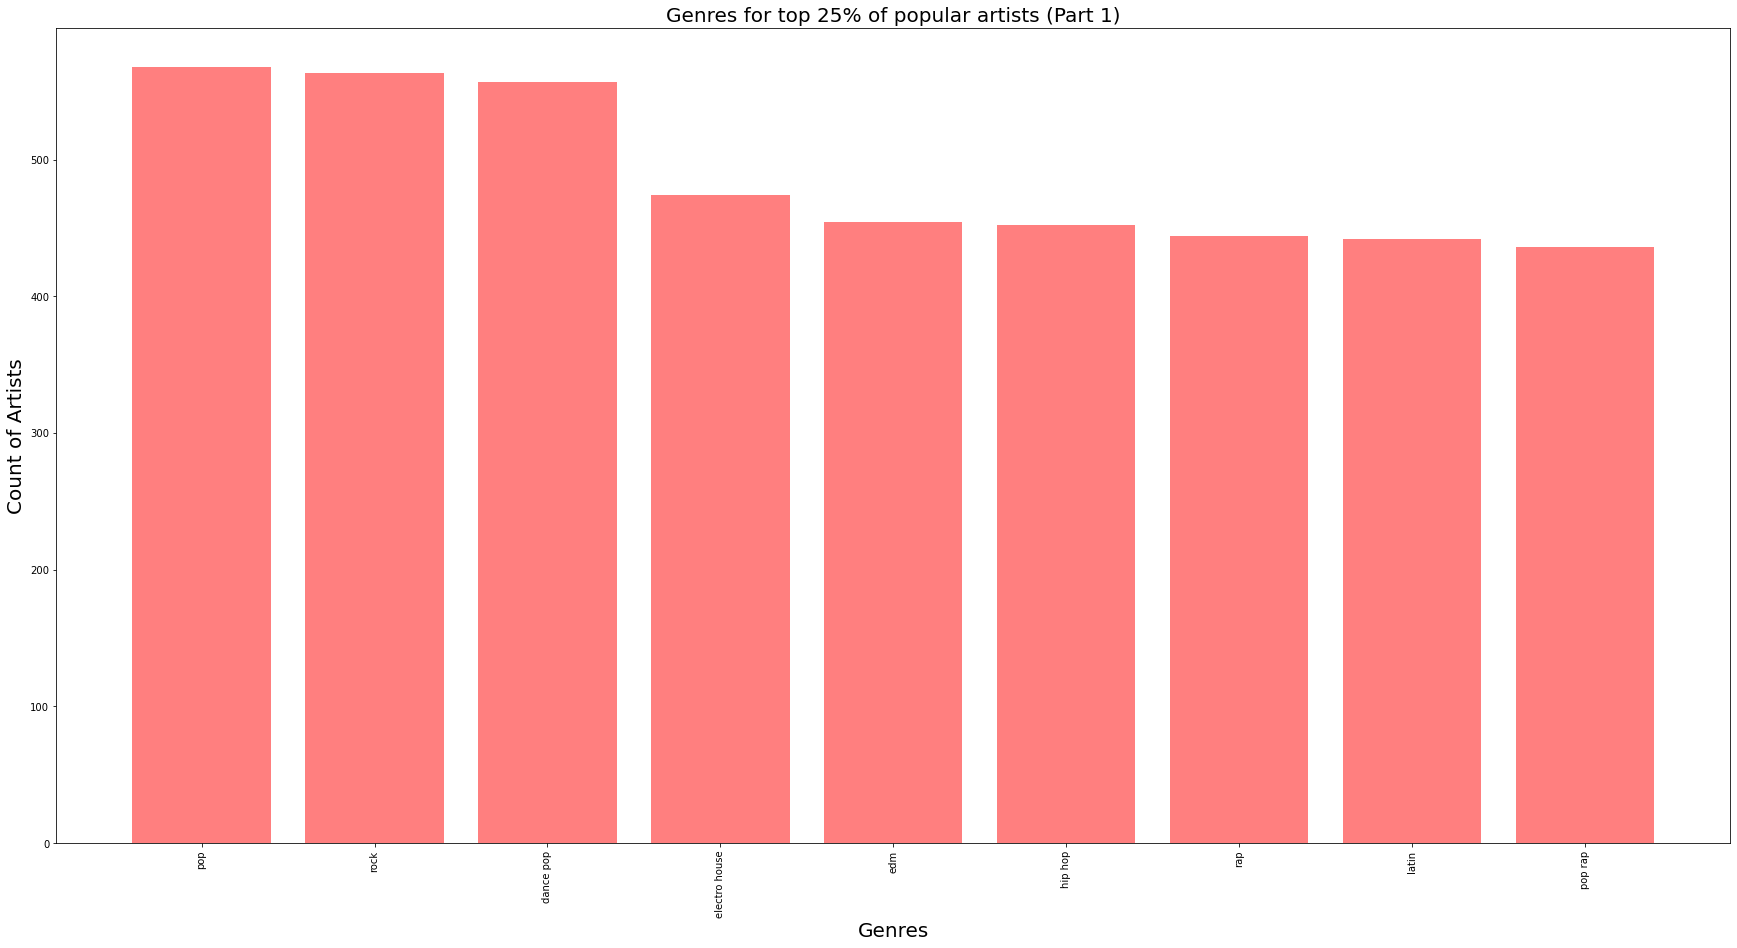

In [7]:
x_axis = np.arange(len(genres_top_10))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(30,15))
plt.bar(x_axis, genres_top_10["Counts of Genres"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, genres_top_10.index, rotation="vertical")
plt.title("Genres for top 25% of popular artists (Part 1)",fontsize=20)
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Count of Artists",fontsize=20)

Text(0, 0.5, 'Count of Artists')

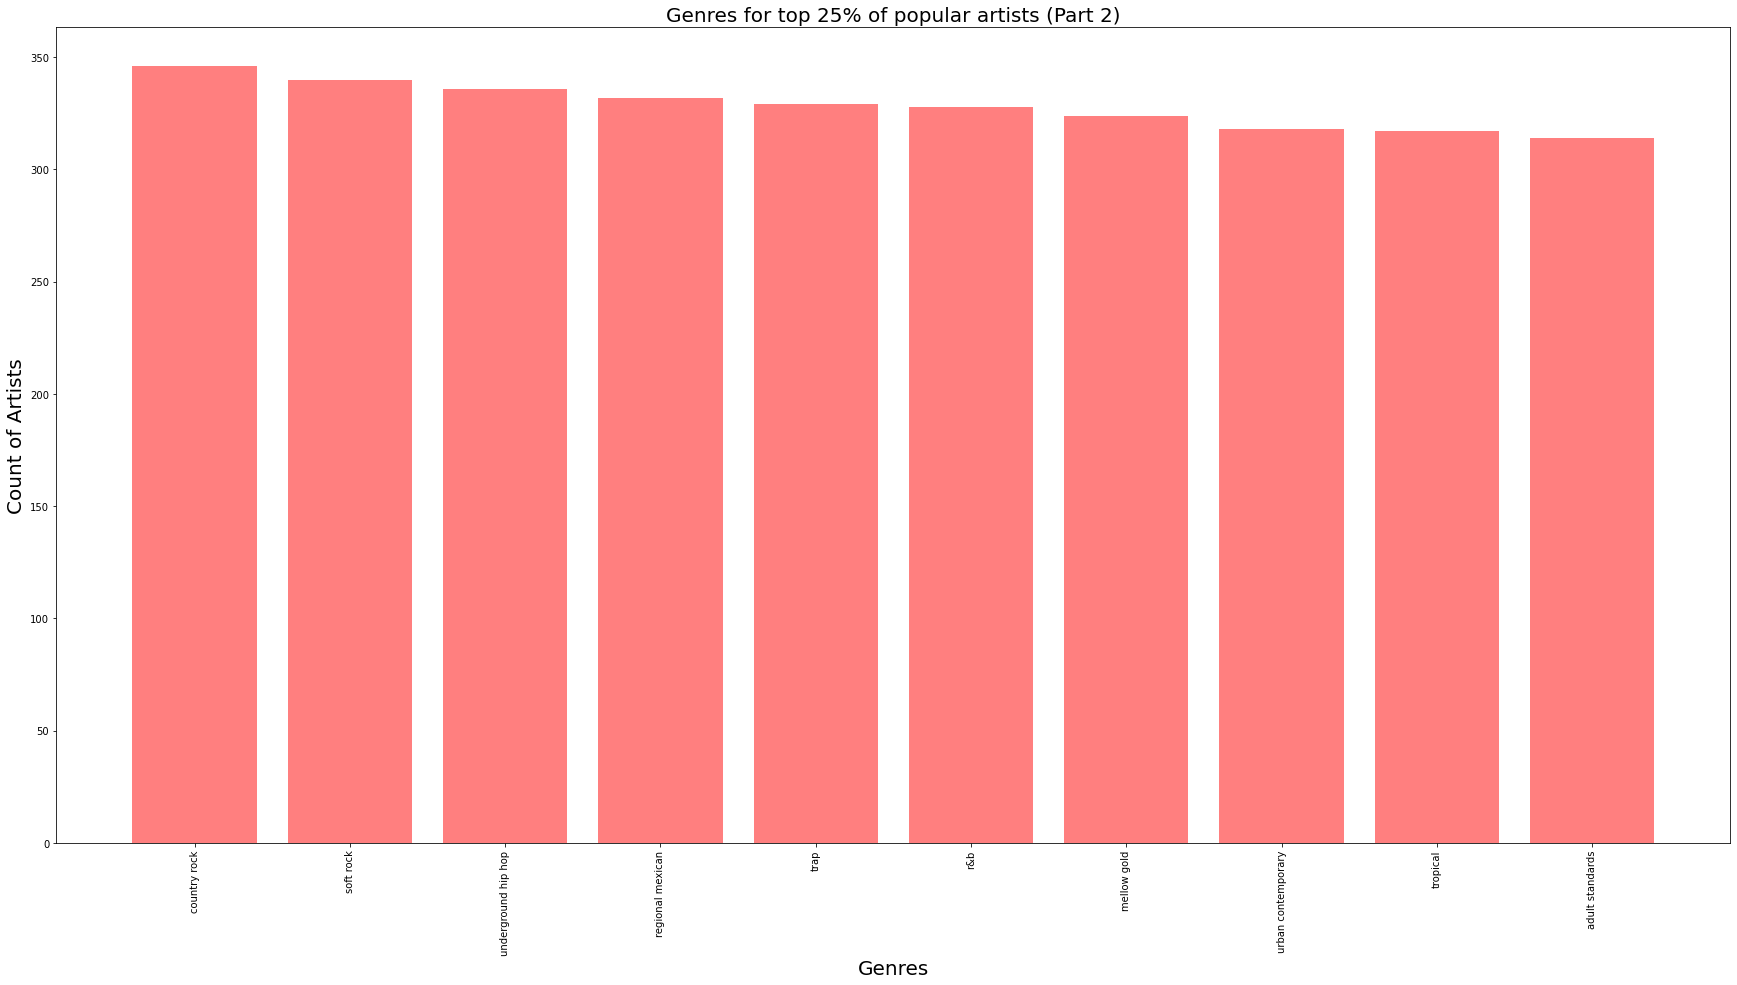

In [8]:
x_axis = np.arange(len(genres_middle_10))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(30,15))
plt.bar(x_axis, genres_middle_10["Counts of Genres"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, genres_middle_10.index, rotation="vertical")
plt.title("Genres for top 25% of popular artists (Part 2)",fontsize=20)
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Count of Artists",fontsize=20)

In [19]:
new_songs= top_100_songs.sort_values(by='year',ascending=False).head(100)

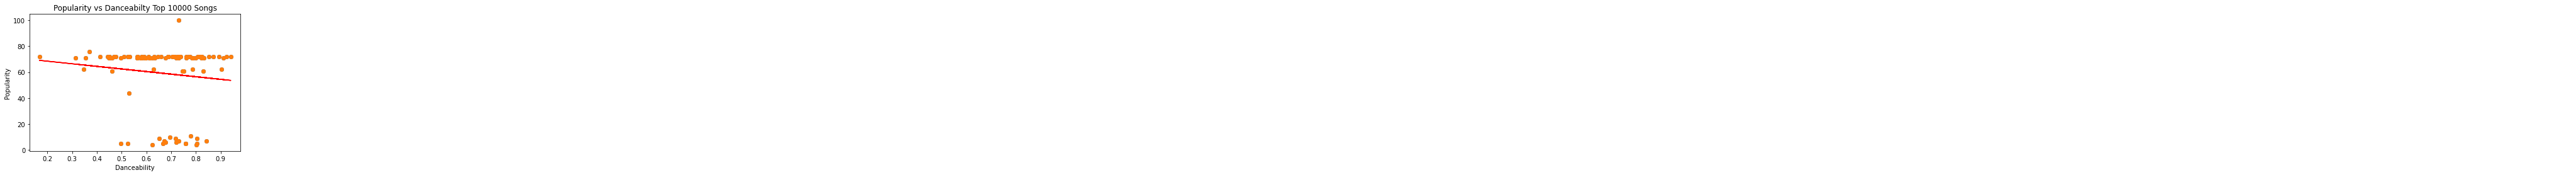

In [28]:
x_values = new_songs['danceability']
y_values = new_songs['popularity']
plt.scatter(x_values,y_values)
plt.title('Popularity vs Danceabilty Top 10000 Songs')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.show()


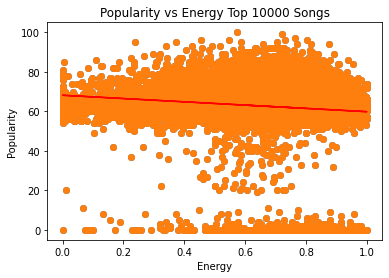

In [11]:
x_values = new_songs['energy']
y_values = new_songs['popularity']
plt.scatter(x_values,y_values)
plt.title('Popularity vs Energy Top 10000 Songs')
plt.xlabel('Energy')
plt.ylabel('Popularity')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()

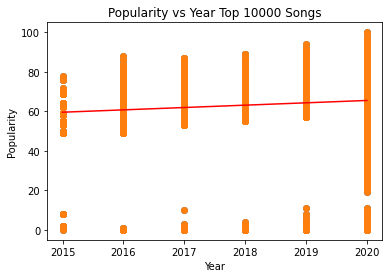

In [12]:
x_values = new_songs['year']
y_values = new_songs['popularity']
plt.scatter(x_values,y_values)
plt.title('Popularity vs Year Top 10000 Songs')
plt.xlabel('Year')
plt.ylabel('Popularity')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()

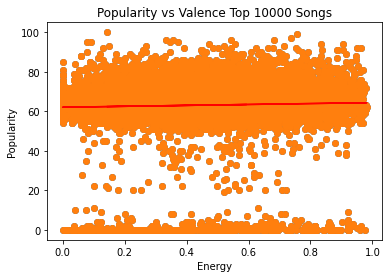

<Figure size 720x720 with 0 Axes>

In [13]:
x_values = new_songs['valence']
y_values = new_songs['popularity']
plt.scatter(x_values,y_values)
plt.title('Popularity vs Valence Top 10000 Songs')
plt.xlabel('Energy')
plt.ylabel('Popularity')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.figure(figsize=(10, 10))
plt.show()

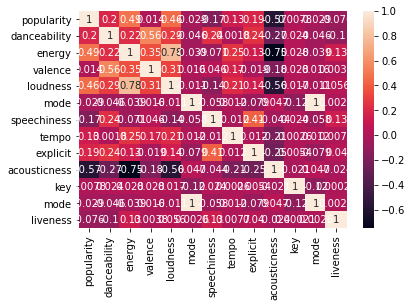

<Figure size 720x720 with 0 Axes>

In [20]:
corrMatrix = top_100_songs[['popularity','danceability','energy','valence','loudness','mode','speechiness','tempo','explicit','acousticness','key','mode','liveness']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(10, 10))
plt.show()

In [22]:
corr = top_100_songs.corr()
corr.style.background_gradient(cmap='coolwarm')

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714
